In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os
import numpy as np

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels.shape

(60000,)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
test_labels.shape

(10000,)

In [12]:
import matplotlib.pyplot as plt

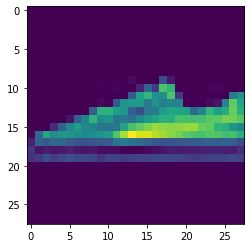

In [13]:
plt.figure()
plt.imshow(np.squeeze(train_images[210]))

In [14]:
train_labels[210]

7

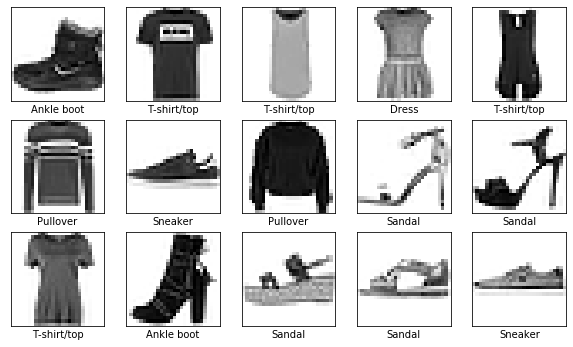

In [15]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [17]:
train_images_norm = train_images / 255.0

In [18]:
test_images_norm = test_images / 255.0

In [19]:
conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )

In [20]:
conv2 = layers.Conv2D(64, (3,3), activation='relu')

In [21]:
conv3 = layers.Conv2D(128, (3,3), activation='relu')

In [22]:
max_pool_1 = layers.MaxPooling2D((2,2))

In [23]:
max_pool_2 = layers.MaxPooling2D((2,2))

In [24]:
max_pool_3 = layers.MaxPooling2D((2,2))

In [25]:
flat_layer = layers.Flatten()

In [26]:
fc = layers.Dense(128, activation='relu')

In [27]:
output = layers.Dense(10, 'softmax')

In [28]:
model = models.Sequential()

model.add(conv1)
model.add(conv2)
model.add(conv3)
model.add(flat_layer)
model.add(fc)
model.add(output)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 61952)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7929984   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 8,023,946
Trainable params: 8,023,946
Non-trainable params: 0
______________________________________________

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.fit(train_images_norm, train_labels, epochs=10, batch_size=512, shuffle=True, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 75s 1ms/sample - loss: 0.5540 - accuracy: 0.8045 - val_loss: 0.3733 - val_accuracy: 0.8607
Epoch 2/10
54000/54000 [==============================] - 73s 1ms/sample - loss: 0.3118 - accuracy: 0.8889 - val_loss: 0.2973 - val_accuracy: 0.8912
Epoch 3/10
54000/54000 [==============================] - 75s 1ms/sample - loss: 0.2502 - accuracy: 0.9096 - val_loss: 0.2620 - val_accuracy: 0.9065
Epoch 4/10
54000/54000 [==============================] - 74s 1ms/sample - loss: 0.2071 - accuracy: 0.9248 - val_loss: 0.2474 - val_accuracy: 0.9090
Epoch 5/10
54000/54000 [==============================] - 73s 1ms/sample - loss: 0.1703 - accuracy: 0.9376 - val_loss: 0.2428 - val_accuracy: 0.9143
Epoch 6/10
54000/54000 [==============================] - 75s 1ms/sample - loss: 0.1362 - accuracy: 0.9506 - val_loss: 0.2391 - val_accuracy: 0.9190
Epoch 7/10
54000/54000 [==============================] -

In [32]:
test_loss, test_accuracy = model.evaluate(test_images_norm, test_labels)

10000/10000 [==============================] - 4s 426us/sample - loss: 0.3304 - accuracy: 0.9194


In [33]:
print(test_accuracy)

0.9194


In [34]:
drop_1 = keras.layers.Dropout(0.5)
drop_2 = keras.layers.Dropout(0.5)
drop_3 = keras.layers.Dropout(0.5)

In [36]:
new_model = models.Sequential()

new_model.add(conv1)

new_model.add(conv2)

new_model.add(drop_2)
new_model.add(conv3)

new_model.add(drop_3)
new_model.add(flat_layer)
new_model.add(fc)
new_model.add(output)

In [37]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  73856     
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [38]:
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
new_model.fit(train_images_norm, train_labels, epochs=10, batch_size=512, shuffle=True, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 95s 2ms/sample - loss: 0.1003 - accuracy: 0.9627 - val_loss: 0.2573 - val_accuracy: 0.9208
Epoch 2/10
54000/54000 [==============================] - 96s 2ms/sample - loss: 0.0772 - accuracy: 0.9710 - val_loss: 0.2689 - val_accuracy: 0.9172
Epoch 3/10
54000/54000 [==============================] - 94s 2ms/sample - loss: 0.0755 - accuracy: 0.9710 - val_loss: 0.2569 - val_accuracy: 0.9225
Epoch 4/10
54000/54000 [==============================] - 95s 2ms/sample - loss: 0.0677 - accuracy: 0.9744 - val_loss: 0.2739 - val_accuracy: 0.9225
Epoch 5/10
54000/54000 [==============================] - 98s 2ms/sample - loss: 0.0549 - accuracy: 0.9800 - val_loss: 0.2762 - val_accuracy: 0.9203
Epoch 6/10
54000/54000 [==============================] - 93s 2ms/sample - loss: 0.0501 - accuracy: 0.9821 - val_loss: 0.2933 - val_accuracy: 0.9218
Epoch 7/10
54000/54000 [==============================] -

In [40]:
test_loss, test_accuracy = new_model.evaluate(test_images_norm, test_labels)

10000/10000 [==============================] - 4s 435us/sample - loss: 0.3440 - accuracy: 0.9202


In [41]:
print(test_accuracy)

0.9202


In [42]:
print(test_loss)

0.343995353160426


In [43]:
predicted_test_labels = new_model.predict(test_images_norm)

In [44]:
predicted_test_labels.shape

(10000, 10)

In [45]:
predicted_test_labels[88]

array([9.9999130e-01, 6.7258612e-13, 5.2526266e-06, 8.2563529e-09,
       3.9758346e-11, 6.2364047e-10, 3.4715590e-06, 7.1311175e-13,
       7.3222255e-11, 8.2086567e-11], dtype=float32)

In [46]:
predicted_test_labels_index = np.argmax(predicted_test_labels[88])
predicted_test_labels_index

0

In [47]:
test_labels[88]

0

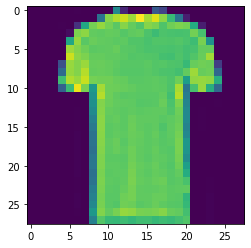

In [48]:
plt.figure()
plt.imshow(np.squeeze(test_images[88]))